In [123]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

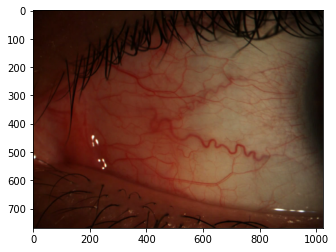

In [194]:
#im = cv2.imread("dataset/BT_12_2.5.BMP")
im = cv2.imread("dataset/BN_056_3.jpg")

hsv = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

plt.imshow(rgb)

In [204]:

def getROI(hsv):
    #We use HSV's V Channel to extract ROI for the eye sclera, as it conforms an area of similar brightness
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
    #In order to create a mask for the sclera, Otsu binarization is used, as it automatically finds a threshold that minimizes intra-class variance.
    ret2,th2 = cv2.threshold(hsv[:,:,2],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours.sort(key=lambda x:cv2.contourArea(x),reverse=True)
    cv2.drawContours(th2,contours[1:], -1, (0),-1)
    
    #rets,ths = cv2.threshold(hsv[:,:,1],0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #th2 = np.multiply(thv,ths)
    fig,ax = plt.subplots(1,2)
    fig.suptitle("Otsu binarization to get ROI")
    ax[0].imshow(th2,cmap='gray')
    ax[0].set_axis_off()
    ax[1].imshow(hsv[:,:,2],cmap='gray')
    ax[1].set_axis_off()



    #Once we have the ROI, we can apply it as a mask for the rest of the procedure.
    hsv = cv2.bitwise_and(hsv,hsv,mask=th2)
    mask_pixels = np.count_nonzero(th2 != 0)
    
    #ax[1].imshow(th2,cmap="gray")
    ax[1].imshow(rgb,cmap="gray")
    plt.show()
    
    return hsv

In [244]:
def extract_vessels(hsv):
    #In order to extract blood vessels in the ROI, we can make use of the S channel, as the blood in the vessels makes that region highly saturated, in contrast to the white,unsaturated sclera.
    #ret2,th2 = cv2.threshold(hsv[:,:,1],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    ker = np.ones((5,5),np.uint8)
    S = hsv[:,:,1]
    S = cv2.GaussianBlur(S,(7,7),0)
    edges = cv2.Canny(S,20,30)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, ker)
    plt.imshow(edges,cmap='gray')
    plt.show()
    return edges

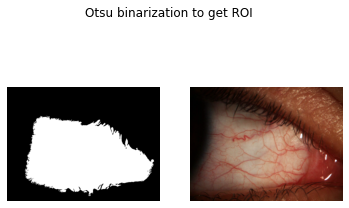

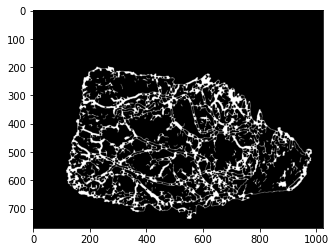

dataset/BN_12_2.5.BMP --> 0.156185


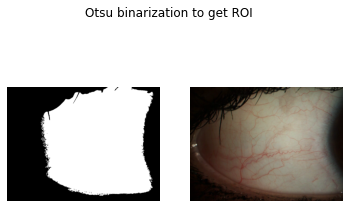

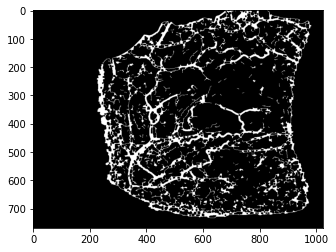

dataset/BT_03_1.BMP --> 0.175221


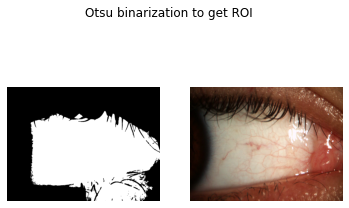

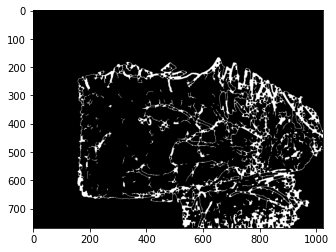

dataset/BN_15_1.BMP --> 0.145142


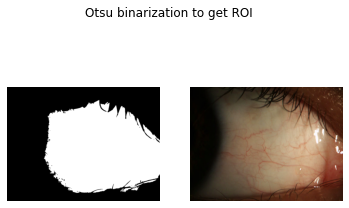

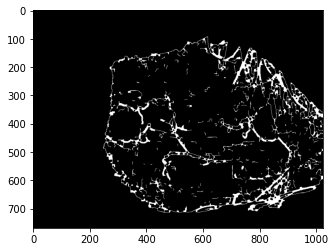

dataset/BN_024_1.1.jpg --> 0.091787


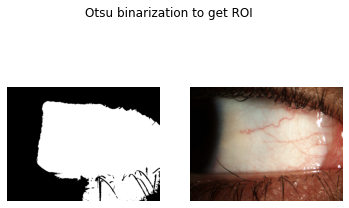

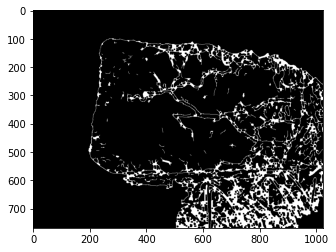

dataset/BN_19_1.BMP --> 0.164155


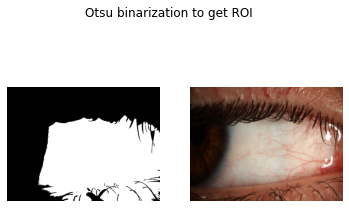

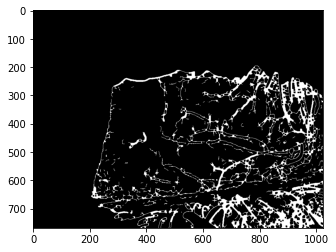

dataset/BT_04_1.BMP --> 0.140935


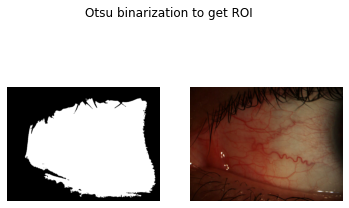

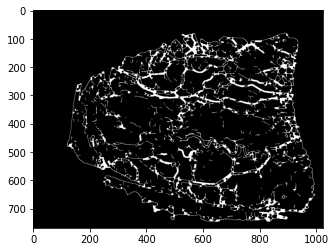

dataset/BN_056_3.jpg --> 0.127879


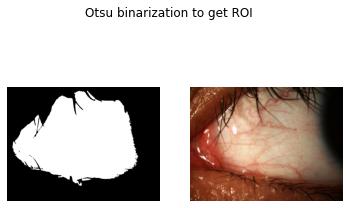

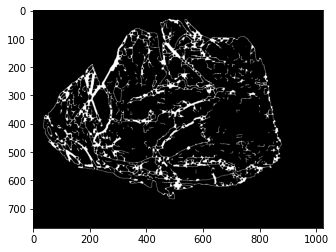

dataset/BN_058_2.jpg --> 0.113138


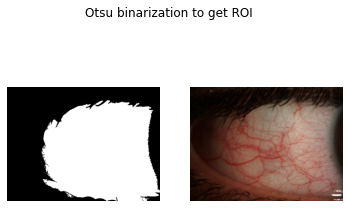

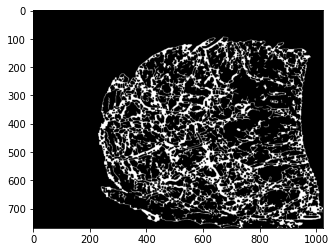

dataset/BT_12_2.5.BMP --> 0.231753


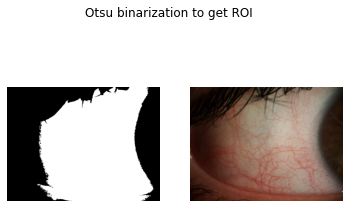

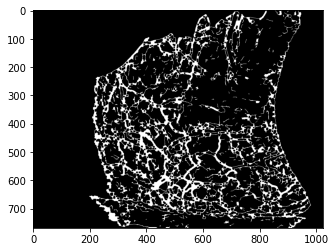

dataset/BT_13_2.BMP --> 0.193901


In [245]:
for image in glob.glob("dataset/*"):
    im = cv2.imread(image)
    hsv = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
    roi = getROI(hsv)
    edges = extract_vessels(roi)
    classif = np.count_nonzero(edges == 255) / mask_pixels
    print("%s --> %f" % (image,classif))
    